# PL

## PL Exciton/Trion Peak Mapping

**PL of `Mapping PL Sample.wdf`**

Expt setting:

- Data collection time: 2025/2/13
- Sampling site: edge of the growth zone
- Exposure time: 0.1s
- Laser Power: 5%
- magnification: 50x
- Accumulation: 1
- Laser setting: central E = 1.88 $cm^{-1}$ ; laser = `532`nm ; grating: 1800 vis
- Step size: 0.3um

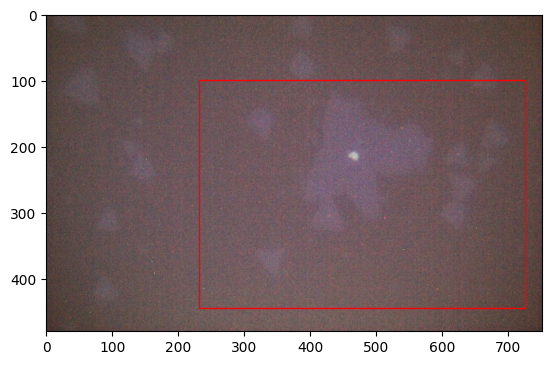

<Figure size 800x600 with 0 Axes>

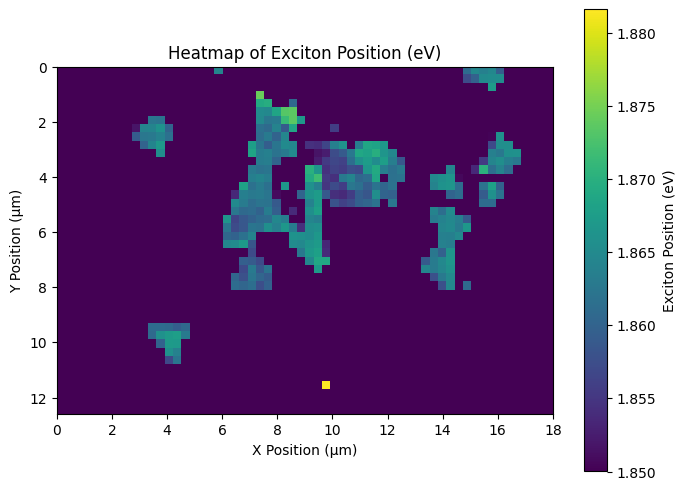

<Figure size 800x600 with 0 Axes>

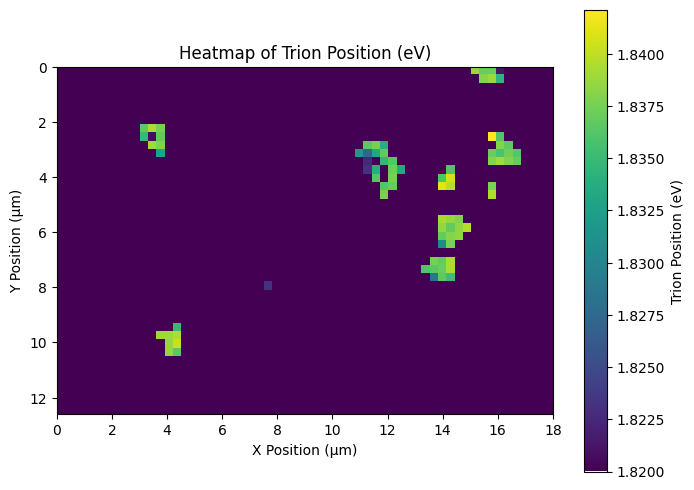

<Figure size 800x600 with 0 Axes>

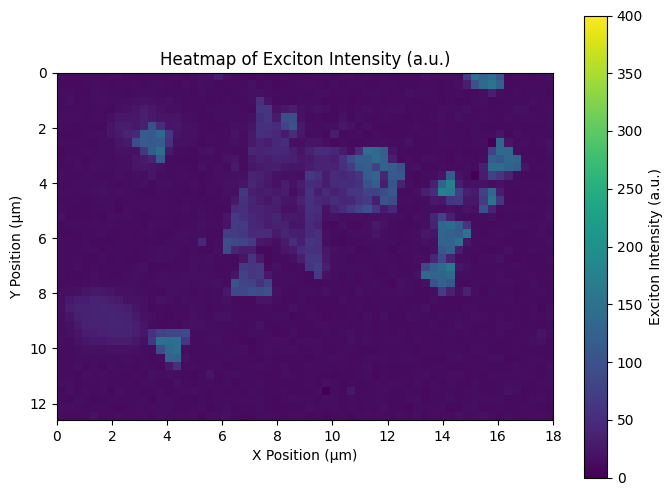

<Figure size 800x600 with 0 Axes>

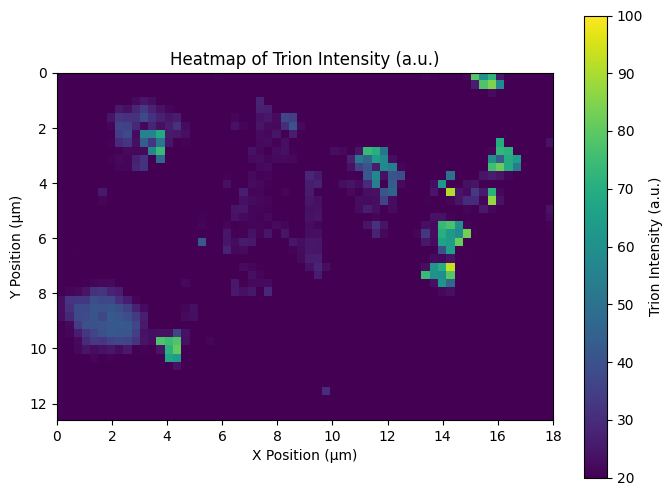

In [2]:
from Mapping import PLMapping

# Define custom peaks and data range
custom_peaks = {
    'Exciton': ([1.85, 0, 0], [1.9, 10, 10]),
    'Trion': ([1.82, 0, 0], [1.85, 10, 5])      # trion peak also fit if you think this is necesseary
}
data_range = (0, 1012)      # by default, 1800vis grating gives 1013 data intensity measurement points

# Initialise the PLMapping class
pl_map = PLMapping(
    filename='Mapping PL Sample.wdf',   # This is your file name. The code only works for .wdf files.
    custom_peaks=custom_peaks,
    step_size=0.3,              # Remember to correct to your step-size parameters 
    poly_degree=1,              # Degree of polynomial fitting for background
    background_remove=True,     # background_remove = True if you want to remove background 
    smoothing=True,             # smoothing=True if you want to smooth noisy signal
    baseline_method='poly',     # Options: 'poly', 'gaussian'
    data_range=data_range       # If no data_range is given it will fit all over the spectrum
)

# Display the optical image
pl_map.show_optical_image()

# Fit the spectral data
pl_map.fit_spectra()

# Plot exciton/trion position heatmap
pl_map.plot_heatmap(data_type='exciton_position')
pl_map.plot_heatmap(data_type='trion_position')

# Plot exciton/trion intensity heatmap
pl_map.plot_heatmap(data_type='exciton_intensity',filter_range=[0,400])
pl_map.plot_heatmap(data_type='trion_intensity',filter_range=[20,100])


<Figure size 800x600 with 0 Axes>

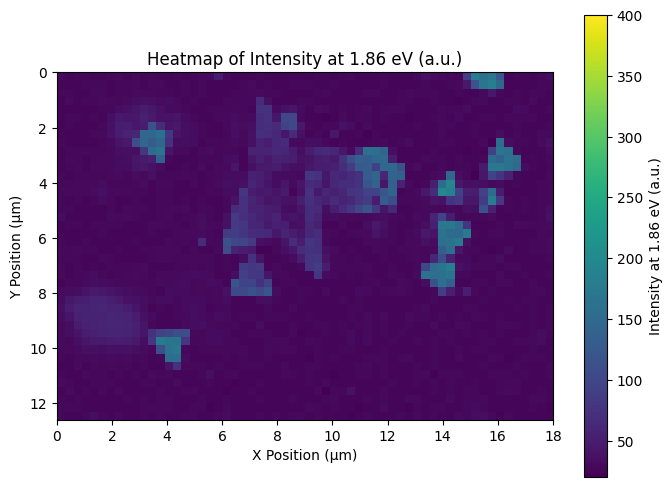

<Figure size 800x600 with 0 Axes>

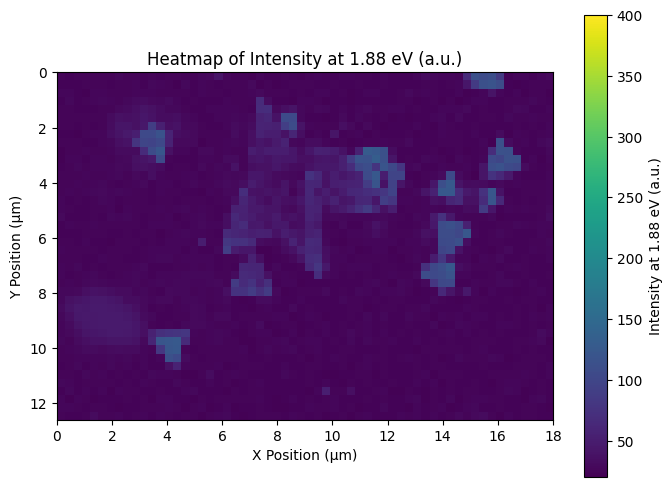

<Figure size 800x600 with 0 Axes>

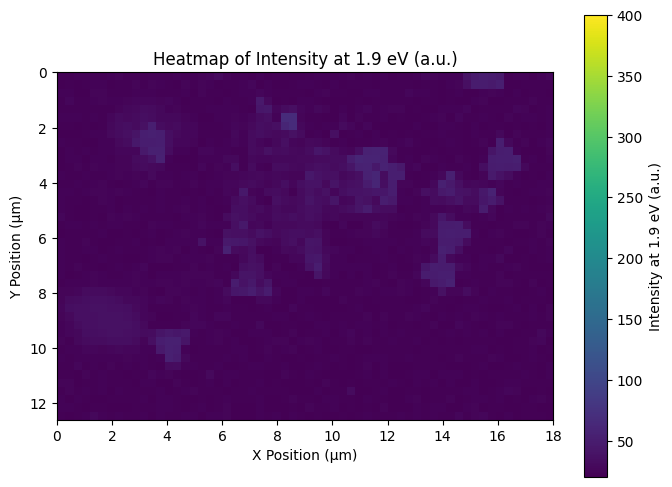

In [3]:
# Plot intensity at a specific eV (1.86 - 1.89eV)

for E in [1.86, 1.88, 1.90]:
    pl_map.plot_heatmap(data_type='specific_intensity', specific_energy=E,filter_range=[20,400])

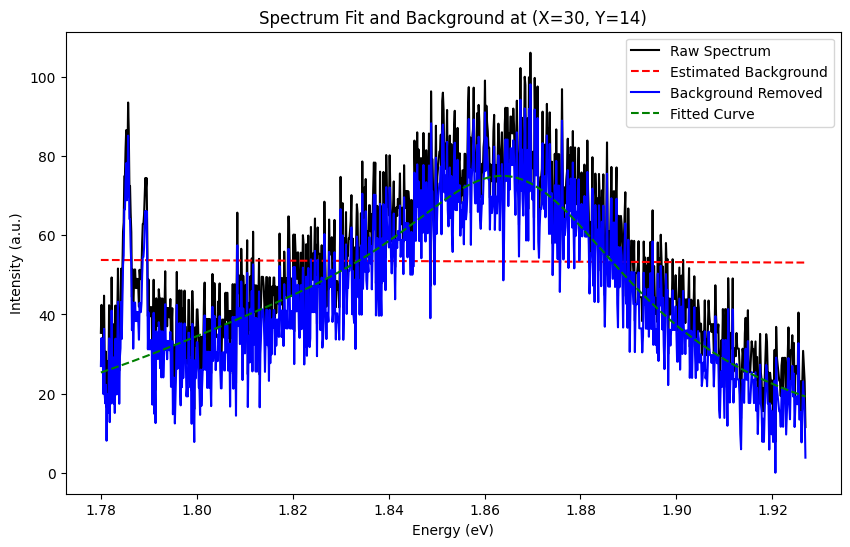

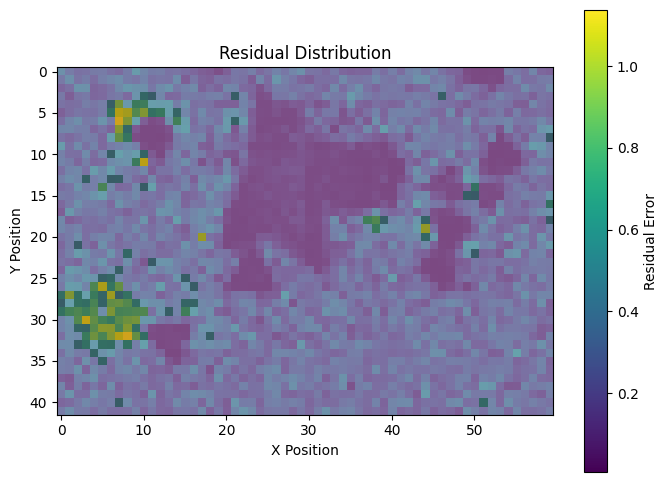

In [7]:
# Plot spectrum of a specific data point
pl_map.plot_spectrum_fit(x=30, y=14)  # x, y are the coordiate of a data point, remember to scale it with step-size

# Plot the fitting residual distribution to check quality of fitting
pl_map.plot_residual_distribution(filter_threshold=0.5)

## Peak intensity integration

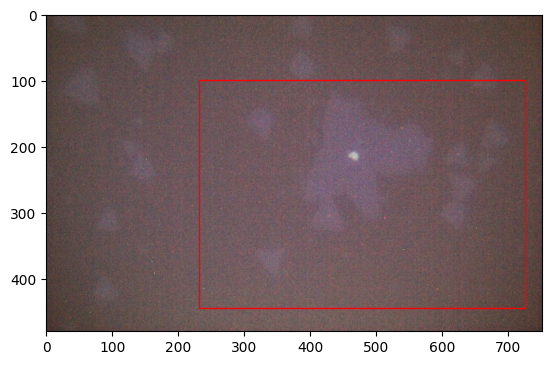

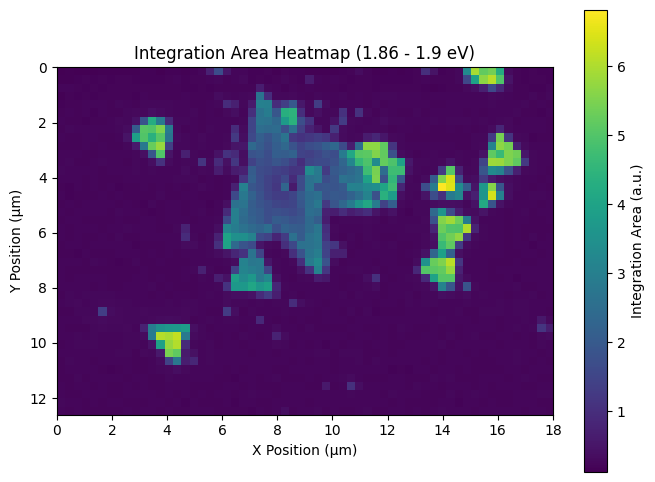

In [5]:
from Mapping import PL_Integration

# Intialise PL_Integration object
pl_integration = PL_Integration('Mapping PL Sample.wdf', 
                                integration_range=(1.86, 1.90),         # PL peak is 1.88eV, this example calculate the intensity near PL
                                step_size=0.3,                          # Step-size must follow correct setting
                                poly_degree=3, background_remove=False  # Removing background is not necessary
                                )

# Display optical image
pl_integration.show_optical_image()

# Calculate
pl_integration.calculate_integration()

# Plot integration of PL heatmap
pl_integration.plot_integration_heatmap()
